In [ ]:
# guided project on concrete

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NB_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NB_DIR)

RAW_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'raw')
os.makedirs(RAW_DATA_DIR, exist_ok=True)

xls_path = os.path.join(RAW_DATA_DIR, 'Concrete_Data.xls')


In [ ]:
df = pd.read_excel(xls_path)
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement_kg_m3',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag_kg_m3',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash_kg_m3',
    'Water  (component 4)(kg in a m^3 mixture)': 'water_kg_m3',
    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'SP_kg_m3',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CA_kg_m3',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'FA_kg_m3',
    'Age (day)' : 'age_day',
    'Concrete compressive strength(MPa, megapascals) ': 'fc_MPa'
}).copy()

df['w/c_ratio'] = df['water_kg_m3']/df['cement_kg_m3']
#df1 = (df.loc[(df['w/c_ratio']>1) & (df['fc_MPa']<50)]).copy()
df


,cement_kg_m3,slag_kg_m3,ash_kg_m3,water_kg_m3,SP_kg_m3,CA_kg_m3,FA_kg_m3,age_day,fc_MPa,w/c_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,1.103708


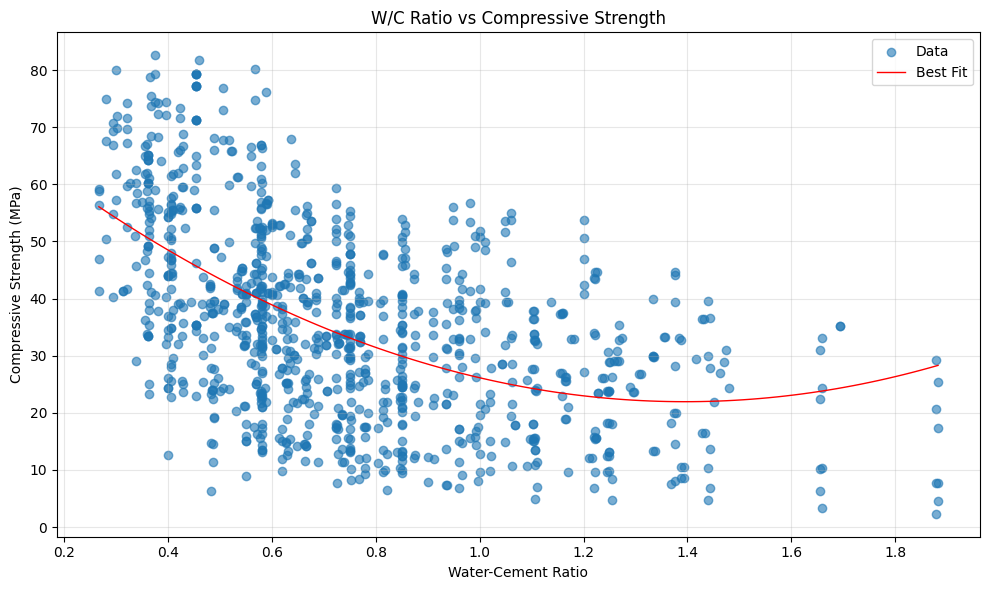

In [ ]:

# Plot 1: W/C Ratio vs Compressive Strength
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['w/c_ratio'], df['fc_MPa'], alpha=0.6, label='Data')

# Add best fit line (polynomial degree 2 = quad)
# z = numpy array of coeff for the polynomial
z = np.polyfit(df['w/c_ratio'], df['fc_MPa'], 2)
# p is the callable polynomial object created from z
p = np.poly1d(z) # 1d means for single variable x
# x_line generates smooth x-values
# y valuaes is calc using p(x_line) like f(x) =y
x_line = np.linspace(df['w/c_ratio'].min(), df['w/c_ratio'].max(), 100)
ax.plot(x_line, p(x_line), 'r-', linewidth=1, label='Best Fit')

ax.set_xlabel('Water-Cement Ratio')
ax.set_ylabel('Compressive Strength (MPa)')
ax.set_title('W/C Ratio vs Compressive Strength')
ax.grid(True, alpha=0.3)
ax.legend()
# Automatically adjusts subplot spacing so labels don't overlap
plt.tight_layout()
plt.show()




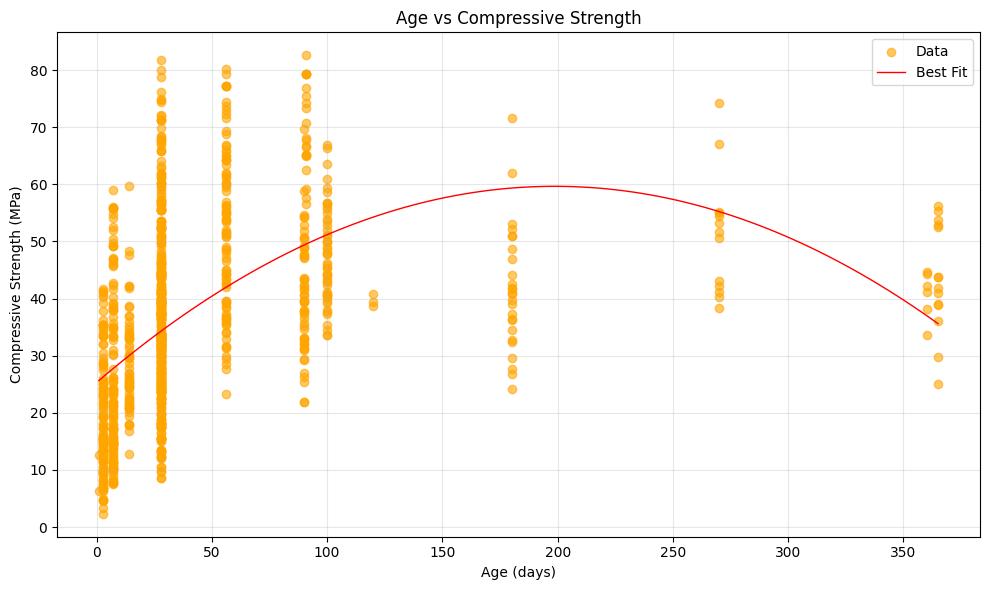

In [ ]:
# Plot 2: Age vs Compressive Strength

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['age_day'], df['fc_MPa'], alpha=0.6, color='orange', label='Data')

# Add best fit line
z = np.polyfit(df['age_day'], df['fc_MPa'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['age_day'].min(), df['age_day'].max(), 100)
ax.plot(x_line, p(x_line), 'r-', linewidth=1, label='Best Fit')

ax.set_xlabel('Age (days)')
ax.set_ylabel('Compressive Strength (MPa)')
ax.set_title('Age vs Compressive Strength')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

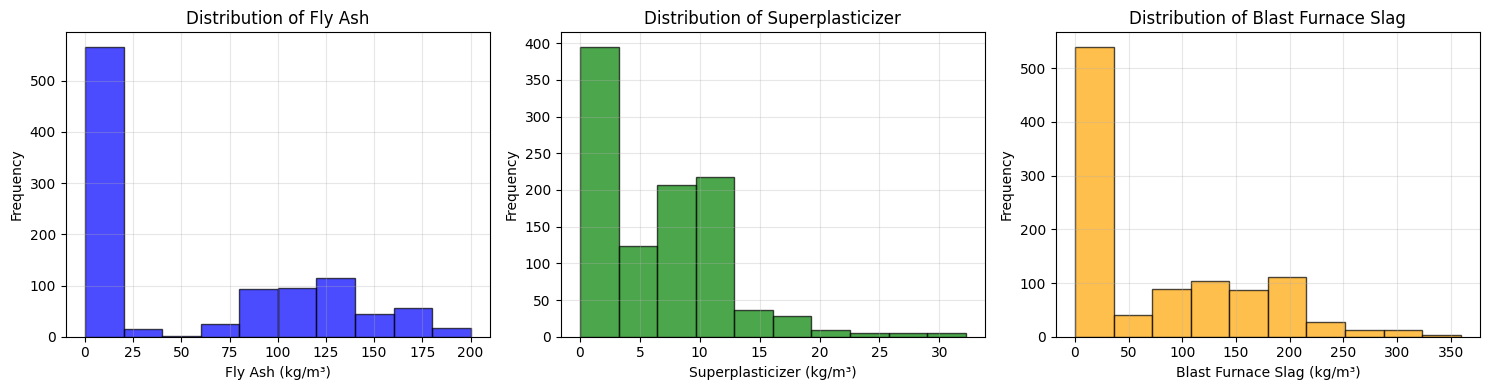

In [ ]:
# Plot histograms for fly_ash, superplasticizer, and blast_furnace_slag

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# for multiple subplots

# Histogram 1: Fly Ash
axes[0].hist(df['ash_kg_m3'], bins=10, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Fly Ash (kg/m³)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fly Ash')
axes[0].grid(True, alpha=0.3)

# Histogram 2: Superplasticizer
axes[1].hist(df['SP_kg_m3'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Superplasticizer (kg/m³)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Superplasticizer')
axes[1].grid(True, alpha=0.3)

# Histogram 3: Blast Furnace Slag
axes[2].hist(df['slag_kg_m3'], bins=10, color='orange', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Blast Furnace Slag (kg/m³)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Blast Furnace Slag')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
#todo
#Calculate the correlation matrix and identify highly correlated columns.